# Heart Disease prediction  using diffrent model to predict accurate score .

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn import linear_model
%matplotlib inline



df=pd.read_csv('heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
df.shape


(303, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

In [8]:
##feature selection 

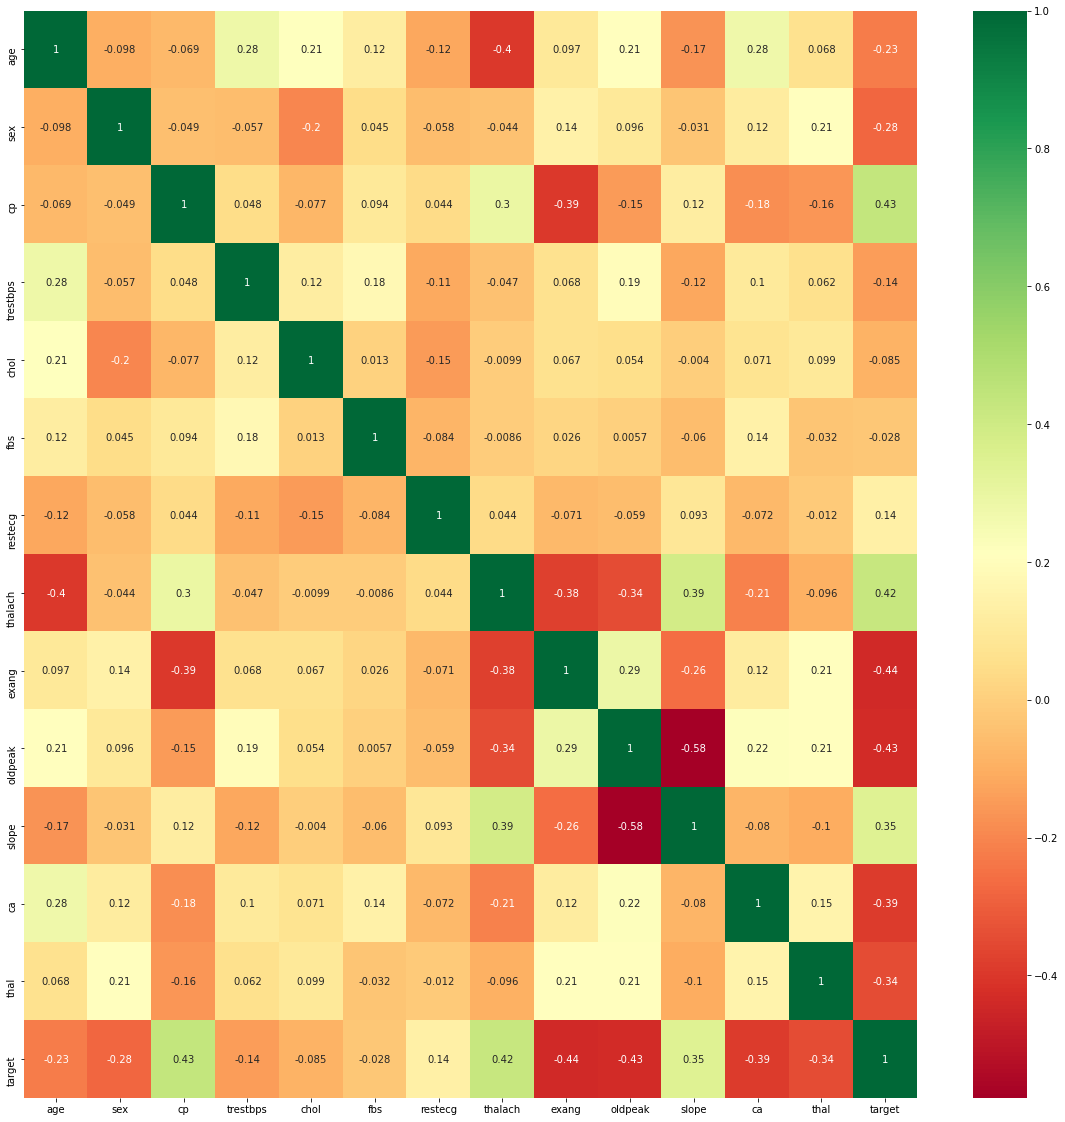

In [9]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [10]:
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'cp'}>,
        <AxesSubplot:title={'center':'trestbps'}>],
       [<AxesSubplot:title={'center':'chol'}>,
        <AxesSubplot:title={'center':'fbs'}>,
        <AxesSubplot:title={'center':'restecg'}>,
        <AxesSubplot:title={'center':'thalach'}>],
       [<AxesSubplot:title={'center':'exang'}>,
        <AxesSubplot:title={'center':'oldpeak'}>,
        <AxesSubplot:title={'center':'slope'}>,
        <AxesSubplot:title={'center':'ca'}>],
       [<AxesSubplot:title={'center':'thal'}>,
        <AxesSubplot:title={'center':'target'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

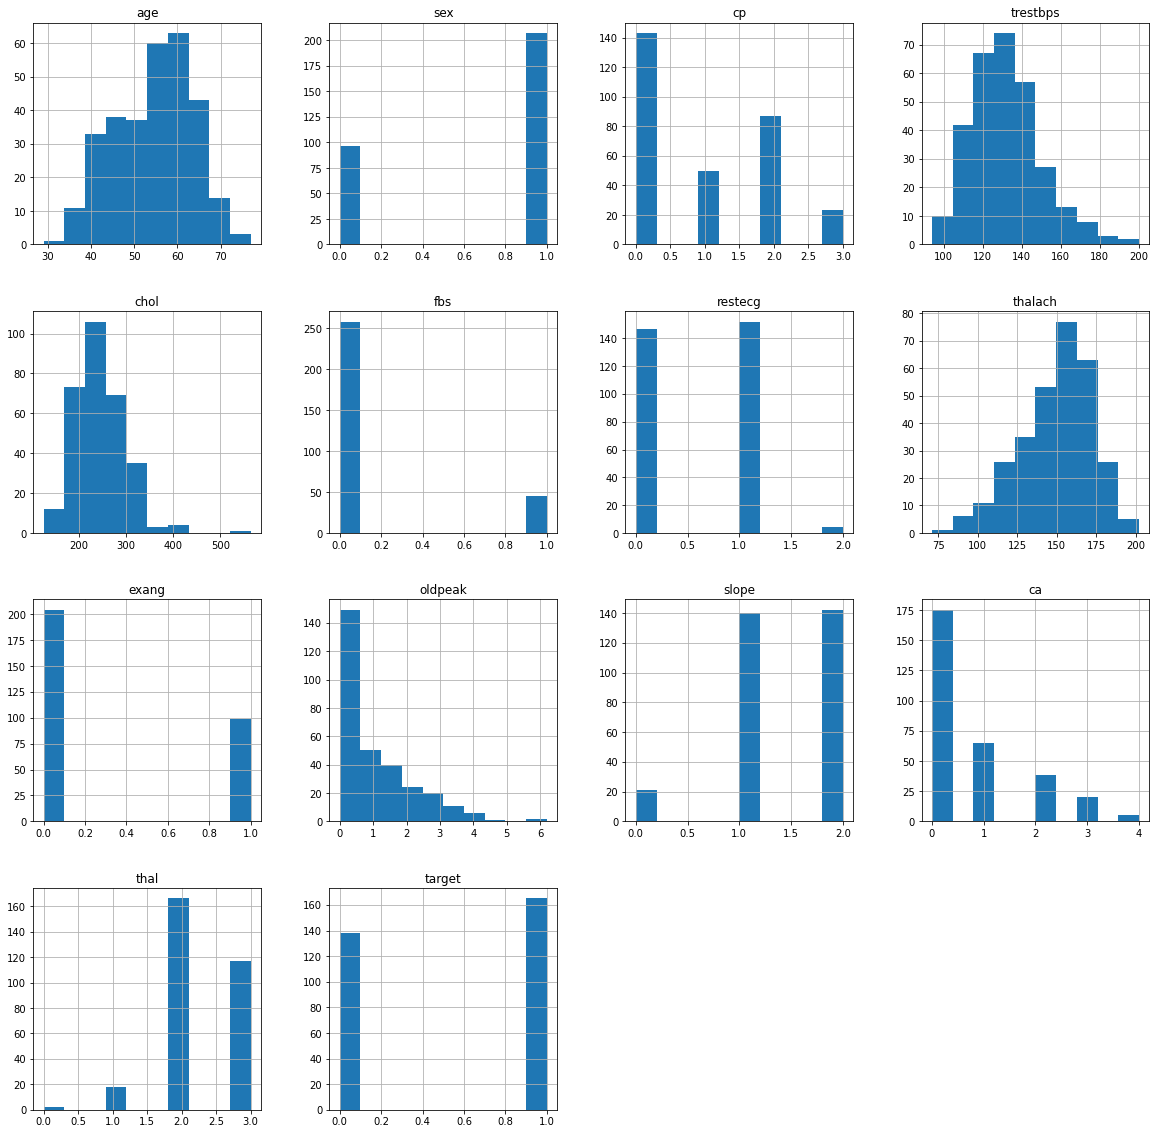

In [11]:
df.hist(figsize=(20,20))

In [12]:
x=df.drop(columns='target',axis=1)
y=df.target

In [13]:
from sklearn.model_selection import train_test_split
X_train,x_test,Y_train,y_test=train_test_split(x,y,train_size=.8)

In [14]:
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
df[columns_to_scale] = standardScaler.fit_transform(df[columns_to_scale])

In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
knn_scores = []
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    score=cross_val_score(knn_classifier,x,y,cv=10)
    knn_scores.append(score.mean())

In [16]:
knn_classifier = KNeighborsClassifier(n_neighbors = 12)
score=cross_val_score(knn_classifier,x,y,cv=10)

In [17]:
score.mean()

0.6670967741935483

In [18]:
## logistic regression 
from sklearn.linear_model import LogisticRegression
model1=LogisticRegression()

In [19]:
model1.fit(X_train,Y_train)

LogisticRegression()

In [20]:
model1.score(x_test,y_test)

0.8852459016393442

In [21]:
## random foreset

In [22]:
from sklearn.ensemble import RandomForestClassifier
model2=RandomForestClassifier()

In [23]:
model2.fit(X_train,Y_train)

RandomForestClassifier()

In [24]:
model2.score(x_test,y_test) ### NICE SCORE 

0.8852459016393442

In [25]:
randomforest_classifier= RandomForestClassifier(n_estimators=10)

scores=cross_val_score(randomforest_classifier,x,y,cv=10)

In [26]:
scores.mean()

0.8182795698924732

In [27]:
input_data = (62,0,0,140,268,0,0,160,0,3.6,0,2,2)

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model2.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('The Person does not have a Heart Disease')
else:
  print('The Person has Heart Disease')

[0]
The Person does not have a Heart Disease


In [28]:
### model no 3 
from sklearn.tree import DecisionTreeClassifier
model3=DecisionTreeClassifier()

In [29]:
model3.fit(X_train,Y_train)

DecisionTreeClassifier()

In [30]:
model3.score(x_test,y_test) ## not bad 

0.7704918032786885

In [31]:
input_data = (62,0,0,140,268,0,0,160,0,3.6,0,2,2)

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model3.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('The Person does not have a Heart Disease')
else:
  print('The Person has Heart Disease')

[0]
The Person does not have a Heart Disease


# Random forest classifer has max score 